Question 1

In [1]:
import pandas as pd
import numpy as np
import re
from datetime import datetime

In [2]:
#loading the data sets
#from google.colab import drive
#drive.mount('/content/drive')
#test_df= pd.read_csv('/content/drive/My Drive/players_22.csv',low_memory=False)# testing (players_22)
train_df= pd.read_csv('male_players.csv',low_memory= False)# training(males)}

In [3]:
train_df.head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90,90,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png


In [4]:
train_df.columns.tolist()

['player_id',
 'player_url',
 'fifa_version',
 'fifa_update',
 'fifa_update_date',
 'short_name',
 'long_name',
 'player_positions',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'league_id',
 'league_name',
 'league_level',
 'club_team_id',
 'club_name',
 'club_position',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined_date',
 'club_contract_valid_until_year',
 'nationality_id',
 'nationality_name',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_bal

In [5]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Columns: 110 entries, player_id to player_face_url
dtypes: float64(18), int64(45), object(47)
memory usage: 135.6+ MB
None


In [6]:
print(train_df.isnull().sum(), "\n\n")

player_id           0
player_url          0
fifa_version        0
fifa_update         0
fifa_update_date    0
                   ..
cb                  0
rcb                 0
rb                  0
gk                  0
player_face_url     0
Length: 110, dtype: int64 




In [7]:
# Handling the missing values , drop all that have 30% of null values
threshold_train = len(train_df) * 0.3
 


In [8]:
train_df = train_df.dropna(thresh=len(train_df) - threshold_train, axis=1)
 

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Columns: 102 entries, player_id to player_face_url
dtypes: float64(14), int64(45), object(43)
memory usage: 125.7+ MB


In [10]:
train_df

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90,90,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,269011,/player/269011/ziye-zhao/230002,23,2,2022-09-26,Zhao Ziye,赵梓业,RW,46,61,...,32+2,32+2,37+2,36+2,31+2,31+2,31+2,36+2,14+2,https://cdn.sofifa.net/players/269/011/23_120.png
161579,269019,/player/269019/junjie-wu/230002,23,2,2022-09-26,Wu Junjie,吴俊杰,LB,46,58,...,41+2,41+2,43+2,44+2,48+2,48+2,48+2,44+2,15+2,https://cdn.sofifa.net/players/269/019/23_120.png
161580,271093,/player/271093/kailin-barlow/230002,23,2,2022-09-26,K. Barlow,Kailin Barlow,CDM,46,58,...,45+2,45+2,47+2,47+2,46+2,46+2,46+2,47+2,14+2,https://cdn.sofifa.net/players/271/093/23_120.png
161581,271555,/player/271555/gideon-tetteh/230002,23,2,2022-09-26,G. Tetteh,Gideon Tetteh,"RW, LW",46,70,...,30+2,30+2,34+2,32+2,28+2,28+2,28+2,32+2,15+2,https://cdn.sofifa.net/players/271/555/23_120.png


In [11]:
print(train_df['age'])

0         27
1         29
2         30
3         32
4         28
          ..
161578    18
161579    19
161580    19
161581    17
161582    17
Name: age, Length: 161583, dtype: int64


In [12]:
# Columns to drop
columns_to_drop = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam',
                   'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm',
                   'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']

columns_to_drop_train = ['player_url', 'fifa_update_date', 'short_name', 'long_name', 'club_joined_date','real_face','nationality_name', 'body_type','club_name','preferred_foot', 'body_type', 'gk','league_name',]

columns_to_drop_sum = columns_to_drop + columns_to_drop_train

columns_to_drop_sum.extend(['player_id',	'fifa_version',	'fifa_update', 'dob', 'player_face_url','league_id','potential', 'club_team_id', 'club_position',
 'club_jersey_number',
 'club_contract_valid_until_year',])


train_df.drop(columns=columns_to_drop_sum, inplace=True, errors='ignore')


In [13]:
train_df['work_rate']

0            Medium/Low
1              High/Low
2              High/Low
3            Medium/Low
4         Medium/Medium
              ...      
161578    Medium/Medium
161579    Medium/Medium
161580      High/Medium
161581    Medium/Medium
161582    Medium/Medium
Name: work_rate, Length: 161583, dtype: object

In [14]:
train_df.head()

,player_positions,overall,value_eur,wage_eur,age,height_cm,weight_kg,league_level,nationality_id,weak_foot,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,CF,93,100500000.0,550000.0,27,169,67,1.0,52,3,...,76,NaN,25,21,20,6,11,15,14,8
1,"LW, LM",92,79000000.0,375000.0,29,185,80,1.0,38,4,...,85,NaN,22,31,23,7,11,15,14,11
2,"RM, LM, RW",90,54500000.0,275000.0,30,180,80,1.0,34,2,...,80,NaN,29,26,26,10,8,11,5,15
3,ST,90,52500000.0,275000.0,32,195,95,1.0,46,4,...,91,NaN,25,41,27,13,15,10,9,12
4,GK,90,63500000.0,300000.0,28,193,92,1.0,21,4,...,37,NaN,25,25,25,87,85,92,90,86


In [15]:
# separating the numeric and catergorical for train_df
# Separate the numeric and Non- numeric features
numeric_data_train_df= train_df.select_dtypes(include = np.number)

In [16]:
non_numeric_train_df = train_df.select_dtypes(include =['object'])

In [17]:
numeric_data_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   overall                      161583 non-null  int64  
 1   value_eur                    159530 non-null  float64
 2   wage_eur                     159822 non-null  float64
 3   age                          161583 non-null  int64  
 4   height_cm                    161583 non-null  int64  
 5   weight_kg                    161583 non-null  int64  
 6   league_level                 158866 non-null  float64
 7   nationality_id               161583 non-null  int64  
 8   weak_foot                    161583 non-null  int64  
 9   skill_moves                  161583 non-null  int64  
 10  international_reputation     161583 non-null  int64  
 11  pace                         143614 non-null  float64
 12  shooting                     143614 non-null  float64
 13 

In [18]:
non_numeric_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   player_positions  161583 non-null  object
 1   work_rate         161583 non-null  object
dtypes: object(2)
memory usage: 2.5+ MB


In [19]:
numeric_data_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   overall                      161583 non-null  int64  
 1   value_eur                    159530 non-null  float64
 2   wage_eur                     159822 non-null  float64
 3   age                          161583 non-null  int64  
 4   height_cm                    161583 non-null  int64  
 5   weight_kg                    161583 non-null  int64  
 6   league_level                 158866 non-null  float64
 7   nationality_id               161583 non-null  int64  
 8   weak_foot                    161583 non-null  int64  
 9   skill_moves                  161583 non-null  int64  
 10  international_reputation     161583 non-null  int64  
 11  pace                         143614 non-null  float64
 12  shooting                     143614 non-null  float64
 13 

In [20]:
numeric_data_train_df.columns

Index(['overall', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg',
       'league_level', 'nationality_id', 'weak_foot', 'skill_moves',
       'international_reputation', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_

In [21]:
# Fill Missing numerical Values for both the train_df and test_df
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

numeric_data_train_df= pd.DataFrame(imputer.fit_transform(numeric_data_train_df),columns=numeric_data_train_df.columns)

In [22]:
numeric_data_train_df['mentality_composure']

0         57.816892
1         57.816892
2         57.816892
3         57.816892
4         57.816892
            ...    
161578    40.000000
161579    35.000000
161580    35.000000
161581    43.000000
161582    30.000000
Name: mentality_composure, Length: 161583, dtype: float64

In [23]:
from sklearn.preprocessing import LabelEncoder

# Create a function to apply label encoding
def label_encode(df, columns):
    label_encoders = {}
    for column in columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
    return df, label_encoders

# List of categorical columns
categorical_columns_train = non_numeric_train_df.columns

# Encode categorical columns in the training dataset
categorical_data_train_df, train_label_encoders = label_encode(non_numeric_train_df, categorical_columns_train)

# Encode categorical columns in the test dataset

# Verifying the encodings are different (for illustration purposes)
print(categorical_data_train_df.head())


   player_positions  work_rate
0               412          7
1              1128          1
2              1541          1
3              1838          7
4               719          8


In [24]:
# putting the numeric and catergorical data together
# Combine training data
merged_train = pd.concat([numeric_data_train_df,categorical_data_train_df], axis=1)

In [26]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train= scaler.fit_transform(merged_train)

In [27]:
scaled_train_df = pd.DataFrame(scaled_train, columns=merged_train.columns)

In [28]:
scaled_train_df.head()

,overall,value_eur,wage_eur,age,height_cm,weight_kg,league_level,nationality_id,weak_foot,skill_moves,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,player_positions,work_rate
0,3.877514,16.451449,24.706815,0.401872,-1.813330,-1.176360,-0.510923,-0.074553,0.091301,2.221492,...,-1.014879,-1.249980,-1.227530,-0.595889,-0.313345,-0.069212,-0.134650,-0.480363,-0.714885,0.401514
1,3.735485,12.848571,16.687273,0.830120,0.556996,0.680668,-0.510923,-0.366880,1.599912,3.551651,...,-1.161552,-0.781296,-1.084230,-0.539297,-0.313345,-0.069212,-0.134650,-0.313512,0.483334,-1.721440
2,3.451428,8.742966,12.104678,1.044244,-0.183731,0.680668,-0.510923,-0.450402,-1.417310,2.221492,...,-0.819314,-1.015638,-0.940931,-0.369522,-0.491553,-0.311984,-0.664104,-0.091044,1.174485,-1.721440
3,3.451428,8.407815,12.104678,1.472491,2.038450,2.823392,-0.510923,-0.199836,1.599912,2.221492,...,-1.014879,-0.312612,-0.893165,-0.199747,-0.075734,-0.372677,-0.428791,-0.257895,1.671512,0.401514
4,3.451428,10.251147,13.250326,0.615996,1.742159,2.394847,-0.510923,-0.721848,1.599912,-1.768985,...,-1.014879,-1.062506,-0.988698,3.988044,4.082458,4.604134,4.336295,3.857769,-0.201123,0.755340


Question 2

In [29]:
dependent_variable=scaled_train_df['overall']

In [30]:
independent_variables = scaled_train_df.drop(columns=['overall']).copy()

In [31]:
correlation_matrix = independent_variables.corrwith(dependent_variable)

In [32]:
# Extract correlations with 'overall' and sort by absolute values
corr_with_target = correlation_matrix.abs().sort_values(ascending=False)

In [33]:
corr_with_target

movement_reactions             0.845753
passing                        0.632617
wage_eur                       0.608711
mentality_composure            0.604074
value_eur                      0.563962
dribbling                      0.563384
attacking_short_passing        0.499757
mentality_vision               0.493282
international_reputation       0.485234
skill_long_passing             0.483808
power_shot_power               0.480297
physic                         0.476732
age                            0.458390
skill_ball_control             0.457011
shooting                       0.448143
skill_curve                    0.415863
power_long_shots               0.409086
mentality_aggression           0.398310
attacking_crossing             0.396833
skill_fk_accuracy              0.387269
attacking_volleys              0.377048
skill_dribbling                0.369827
power_stamina                  0.360025
power_strength                 0.350786
mentality_positioning          0.350178


In [34]:
n_top_features = 10  # Number of top features to select
top_features = corr_with_target[:n_top_features]

Text(0.5, 1.0, 'Top Features with Correlation with Overall Rating')

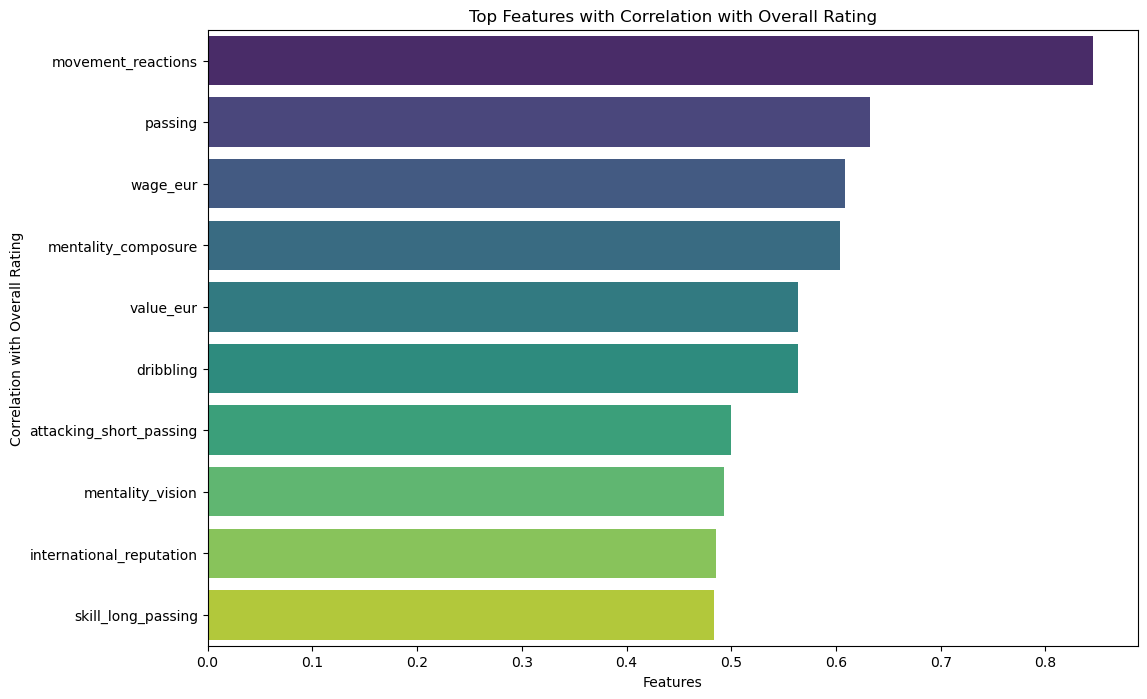

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x=top_features, y = top_features.index, palette='viridis')
plt.xlabel('Features')
plt.ylabel('Correlation with Overall Rating')
plt.title('Top Features with Correlation with Overall Rating')

Question 2

In [36]:
feature_subsets = scaled_train_df[top_features.index]

In [37]:
feature_subsets.head()

,movement_reactions,passing,wage_eur,mentality_composure,value_eur,dribbling,attacking_short_passing,mentality_vision,international_reputation,skill_long_passing
0,3.535775,2.940185e+00,24.706815,6.456683e-16,16.451449,3.492538e+00,2.086204,2.588430,10.148137,1.536683
1,3.099571,2.434335e+00,16.687273,6.456683e-16,12.848571,2.977689e+00,1.609554,1.957672,10.148137,1.273977
2,2.990520,2.636675e+00,12.104678,6.456683e-16,8.742966,3.080659e+00,1.881925,2.167924,10.148137,1.536683
3,2.554317,2.434335e+00,12.104678,6.456683e-16,8.407815,2.462841e+00,1.745740,2.097840,10.148137,1.536683
4,2.990520,-7.188561e-16,13.250326,6.456683e-16,10.251147,7.316434e-16,-1.114157,-2.317466,10.148137,-0.761996


Question 3

In [38]:
#Question 3
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [39]:
X = feature_subsets
y =train_df['overall']

In [40]:
concat_df = pd.concat([X, y], axis=1)

In [41]:
#randomization of the data
concat_df = concat_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [42]:
concat_df = pd.concat([X, y], axis=1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

In [78]:
#Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) #100
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
rf_rmse = np.sqrt(-rf_scores.mean())

rf_model.fit(X_train, y_train)
score = rf_model.score(X_test, y_test)
mse = mean_squared_error(y_test, rf_model.predict(X_test))

print("RMSE: %.4f" % mse)
print("size of prediction: ", len(rf_model.predict(X_test)))
print("prediction: \n", rf_model.predict(X_test))
print("test score: {0:.4f}\n".format(score))

RMSE: 4.0081
size of prediction:  19239
prediction: 
 [91.76 91.55 90.   ... 53.96 55.08 56.11]
test score: 0.9153



In [46]:
#XGBoost Regressor
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_scores = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
xgb_rmse = np.sqrt(-xgb_scores.mean())
xgb_model.fit(X_train, y_train)
score = xgb_model.score(X_test, y_test)
mse = mean_squared_error(y_test, xgb_model.predict(X_test))

print("RMSE: %.4f" % np.sqrt(mse))
print("size of prediction: ", len(xgb_model.predict(X_test)))
print("prediction: \n", xgb_model.predict(X_test))
print("test score: {0:.4f}\n".format(score))

RMSE: 1.6289
size of prediction:  32317
prediction: 
 [66.70487  63.122375 69.22728  ... 57.49236  63.66807  53.51797 ]
test score: 0.9465



In [79]:
#Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=500, random_state=42, max_depth=4, min_samples_split=2, learning_rate=0.2)
gb_scores = cross_val_score(gb_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
gb_rmse = np.sqrt(-gb_scores.mean())
gb_model.fit(X_train, y_train)
score = gb_model.score(X_test, y_test)
mse = mean_squared_error(y_test, gb_model.predict(X_test))

print("RMSE: %.4f" % mse)
print("size of prediction: ", len(gb_model.predict(X_test)))
print("prediction: \n", gb_model.predict(X_test))
print("test score: {0:.4f}\n".format(score))

RMSE: 4.3624
size of prediction:  19239
prediction: 
 [92.75419387 91.60941263 91.08784486 ... 53.1154904  55.17709449
 54.54087315]
test score: 0.9078



In [48]:
#DecisionTreeRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
param_grid = {
    'max_depth': [2, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1.0, 'sqrt', 'log2']
}
grid_search = GridSearchCV(dt_model, param_grid, cv=kf, scoring='neg_mean_squared_error')
gs_scores = cross_val_score(dt_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
gs_rmse = np.sqrt(-gs_scores.mean())
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_dt_model = grid_search.best_estimator_

score = best_dt_model.score(X_test, y_test)
mse = mean_squared_error(y_test, best_dt_model.predict(X_test))

print("MSE: %.4f" % mse)
print("size of prediction: ", len(best_dt_model.predict(X_test)))
print("prediction: \n", best_dt_model.predict(X_test))
print("test score: {0:.4f}\n".format(score))

MSE: 3.6997
size of prediction:  32317
prediction: 
 [66.88888889 63.47530864 69.09364768 ... 57.97584541 63.70703364
 53.01454545]
test score: 0.9254



Optimization

In [69]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error


params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.1, 'loss': 'squared_error'}
improved_gbr = GradientBoostingRegressor(**params)

improved_gbr.fit(X_train,y_train)

score = improved_gbr.score(X_test, y_test)

# calculate the Mean Squared Error
mse = mean_squared_error(y_test, improved_gbr.predict(X_test))

print("MSE: %.4f" % mse)
print("size of prediction: ", len(improved_gbr.predict(X_test)))
print("prediction: \n", improved_gbr.predict(X_test))
print("test score: {0:.4f}\n".format(score))

MSE: 4.3213
size of prediction:  19239
prediction: 
 [92.26021959 91.758155   90.67638059 ... 53.54534656 54.95403856
 54.62835522]
test score: 0.9087



In [70]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
params = {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.2, 'subsample':0.8}

improved_xgb = xgb.XGBRegressor(**params)

improved_xgb.fit(X_train, y_train)

score = improved_xgb.score(X_test, y_test)

# calculate the Mean Squared Error
mse = mean_squared_error(y_test, improved_xgb.predict(X_test))

print("MSE: %.4f" % mse)
print("size of prediction: ", len(improved_xgb.predict(X_test)))
print("prediction: \n", improved_xgb.predict(X_test))
print("test score: {0:.4f}\n".format(score))

MSE: 4.1436
size of prediction:  19239
prediction: 
 [92.04758  90.835655 90.88054  ... 53.369343 55.383858 55.066147]
test score: 0.9125



Ensembling/ Question 4

In [80]:
ensemble = VotingRegressor(estimators=[
    ('improved_xgb', improved_xgb),
    ('rf_model', rf_model),
    ('best_dt_model',best_dt_model),
    ( 'improved_gbr',improved_gbr)
])

ensemble.fit(X_train, y_train)

y_pred = ensemble.predict(X_test)
score = ensemble.score(X_test, y_test)


# Calculate RMSE (Root Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

print("MSE: %.4f" % mse)
print("size of prediction: ", len(ensemble.predict(X_test)))
print("prediction: \n", ensemble.predict(X_test))
print("test score: {0:.4f}\n".format(score))

MSE: 4.2329
size of prediction:  19239
prediction: 
 [92.14194912 91.66095255 90.40379492 ... 54.09773371 55.23353544
 55.74402493]
test score: 0.9106



Question 5

In [52]:
#testing the with the players_22
#create a function for data procesing ...not traiun ...you are just using it!!!!!!!!!!!!!!!!
test_df= pd.read_csv('players_22.csv',low_memory=False)# testing (players_22)


In [61]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

def label_encode(df, columns):
    label_encoders = {}
    for column in columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))
        label_encoders[column] = le
    return df, label_encoders

def prepare_data(df):
    # Select relevant features and the dependent variable
    selected_features = ['movement_reactions', 'passing', 'wage_eur', 'mentality_composure',
                         'value_eur', 'dribbling', 'attacking_short_passing', 'mentality_vision',
                         'international_reputation', 'skill_long_passing', 'overall']  # Include 'overall' as dependent variable
    
    data = df[selected_features].copy()

    numeric_data_test_df = data.select_dtypes(include=np.number)
    non_numeric_test_df = data.select_dtypes(include=['object'])

    # Fill missing values for selected columns
    imputer = SimpleImputer(strategy='mean')
    numeric_data_test_df = pd.DataFrame(imputer.fit_transform(numeric_data_test_df), columns=numeric_data_test_df.columns)
    
    # List of categorical columns
    categorical_columns_test = non_numeric_test_df.columns

    # Encode categorical columns in the dataset
    categorical_data_test_df, test_label_encoders = label_encode(non_numeric_test_df, categorical_columns_test)

    # Merge numeric and encoded categorical data
    merged_test = pd.concat([numeric_data_test_df, categorical_data_test_df], axis=1)

    scaler = StandardScaler()
    scaled_test = scaler.fit_transform(merged_test)

    # Create a DataFrame with scaled features
    scaled_df = pd.DataFrame(scaled_test, columns=merged_test.columns)

    # Reset index for consistency
    scaled_df.reset_index(drop=True, inplace=True)
    data.reset_index(drop=True, inplace=True)

    # Combine scaled features with the dependent variable
    final_data = scaled_df.copy()

    # Split into features and target
    X = final_data.drop(columns=['overall'])
    y = merged_test['overall']

    return X, y

# Usage:
# Assuming test_df is your input DataFrame
X_test, y_test = prepare_data(test_df)


In [59]:
print(X_test, y_test)

       movement_reactions   passing  mentality_composure  value_eur  \
0                3.599846  3.548135             3.131025   9.889601   
1                3.489252  2.284233             2.473077  15.350958   
2                3.599846  2.389558             3.048782   5.546836   
3                3.046874  3.021509             2.884295  16.601147   
4                3.268063  3.758786             2.555321  16.140551   
...                   ...       ...                  ...        ...   
19234           -0.934526 -1.191498            -1.721343  -0.365905   
19235           -1.376903 -0.770197            -0.898908  -0.360641   
19236           -1.708687 -1.296823            -1.803587  -0.361957   
19237           -1.487498 -2.244749            -0.898908  -0.360641   
19238           -0.823931 -1.296823            -1.803587  -0.360641   

        wage_eur  dribbling  attacking_short_passing  mentality_vision  \
0      15.998022   3.564477                 2.217457          3.006228   

In [62]:
y_test

0        93.0
1        92.0
2        91.0
3        91.0
4        91.0
         ... 
19234    47.0
19235    47.0
19236    47.0
19237    47.0
19238    47.0
Name: overall, Length: 19239, dtype: float64

In [81]:
# improved_gbr is your trained GradientBoostingRegressor model
score = improved_gbr.score(X_test, y_test)
y_pred_22 = improved_gbr.predict(X_test)

# Print the size of the prediction
print("Size of prediction: ", len(y_pred_22))

# Print the predictions
print("Predictions: \n", y_pred_22)

# Print the test score
print("Test score: {0:.4f}\n".format(score))

Size of prediction:  19239
Predictions: 
 [92.26021959 91.758155   90.67638059 ... 53.54534656 54.95403856
 54.62835522]
Test score: 0.9087



In [82]:
score = rf_model.score(X_test,y_test)
y_pred_22 = rf_model.predict(X_test)
print("size of prediction: ", len(rf_model.predict(X_test)))
print("prediction: \n", rf_model.predict(X_test))
print("test score: {0:.4f}\n".format(score))

size of prediction:  19239
prediction: 
 [91.76 91.55 90.   ... 53.96 55.08 56.11]
test score: 0.9153



In [83]:
score = gb_model.score(X_test,y_test)
# Make predictions using the ensemble model
y_pred_22 = gb_model.predict(X_test)
print("size of prediction: ", len(gb_model.predict(X_test)))
print("prediction: \n", gb_model.predict(X_test))
print("test score: {0:.4f}\n".format(score))

size of prediction:  19239
prediction: 
 [92.75419387 91.60941263 91.08784486 ... 53.1154904  55.17709449
 54.54087315]
test score: 0.9078



In [84]:
score = ensemble.score(X_test, y_test)
# Make predictions using the ensemble model
y_pred_22 = ensemble.predict(X_test)
print("size of prediction: ", len(ensemble.predict(X_test)))
print("prediction: \n", ensemble.predict(X_test))
print("test score: {0:.4f}\n".format(score))

size of prediction:  19239
prediction: 
 [92.14194912 91.66095255 90.40379492 ... 54.09773371 55.23353544
 55.74402493]
test score: 0.9106



In [85]:
import joblib
joblib.dump(ensemble,'ensemble_model.pkl')

['ensemble_model.pkl']

In [86]:
joblib.dump(scaler,'scaler_model.pkl')

['scaler_model.pkl']